# I Introduction

This notebook describes the full pipeline for ABC Enhancer Gene Prediction model
  
[broadinstitute/ABC-Enhancer-Gene-Prediction: Cell type specific enhancer-gene predictions using ABC model (Fulco, Nasser et al, Nature Genetics 2019)](https://github.com/broadinstitute/ABC-Enhancer-Gene-Prediction)  


## Load packages

In [3]:
#from sevenbridges import Api, ImportExportState
import yaml
import time
import json
import importlib
import getpass
import sevenbridges

In [4]:
%load_ext yamlmagic

# II CWL Description

## Section 1/4 - Workflow Label and Documentation

In [5]:
%%yaml label_and_description

cwlVersion: v1.2
class: Workflow
label: abc-enhancer-gene-prediction
$namespaces:
  sbg: https://sevenbridges.com

requirements:
- class: InlineJavascriptRequirement
- class: StepInputExpressionRequirement

<IPython.core.display.Javascript object>

## Section 2/4 App Inputs

In [7]:
%%yaml inputs
inputs:
- id: sort_order
  type: File
  sbg:x: -504
  sbg:y: -578
- id: bam
  type: File
  secondaryFiles:
  - pattern: .bai
    required: true
  sbg:fileTypes: BAM
  sbg:x: -562
  sbg:y: -203
- id: regions_includelist
  type: File
  sbg:fileTypes: BED
  sbg:x: 27
  sbg:y: -661
- id: regions_blocklist
  type: File
  sbg:fileTypes: BED
  sbg:x: -112.57969665527344
  sbg:y: -612.9046630859375
- id: chr_sizes
  type: File
  sbg:x: -260.5796813964844
  sbg:y: -116.90462493896484

<IPython.core.display.Javascript object>

## Section 3/4 Steps

In [10]:
%%yaml steps

steps:
- id: makecandidateregions
  label: MACS2 Call Candidate Regions
  in:
  - id: narrow_peak
    source: macs2_call_peaks/sorted_peaks
  - id: bam
    source: bam
  - id: chr_sizes
    source: chr_sizes
  - id: regions_blocklist
    source: regions_blocklist
  - id: regions_includelist
    source: regions_includelist
  run: step01B_macs2_call_candidate_regions.cwl
  out:
  - id: candidate_regions
  - id: counts
  sbg:x: 133
  sbg:y: -369

- id: macs2_call_peaks
  label: MACS2 Call Peaks
  in:
  - id: bam
    source: bam
  - id: sort_order
    source: sort_order
  run: step01A_macs2_call_peaks.cwl
  out:
  - id: model_r_script
  - id: sorted_peaks
  - id: peaks_xls
  - id: summits
  sbg:x: -329
  sbg:y: -441

-id run_neighborhoods
  label: Run Neighborhoods
  in:
  run: step02_run_neighborhoods.tool.cwl
  out:


<IPython.core.display.Javascript object>

## Section 4/4 Tool Outputs and save app

In [9]:
%%yaml outputs

outputs:
- id: counts
  type: File
  outputSource:
  - makecandidateregions/counts
  sbg:x: 314.9624328613281
  sbg:y: -526.222900390625
- id: candidate_regions
  type: File
  outputSource:
  - makecandidateregions/candidate_regions
  sbg:x: 286.9624328613281
  sbg:y: -184.22291564941406

<IPython.core.display.Javascript object>

In [11]:
with open('../cwl/abc-enchancer-gene-prediction.wf.cwl', 'w') as f:
    data = yaml.dump(label_and_description | inputs | outputs | steps, f, sort_keys=False, default_flow_style=False)

# III Test tool

In [13]:
%%bash
cwltool --tool-help ../cwl/abc-enchancer-gene-prediction.wf.cwl

INFO /home/codespace/.python/current/bin/cwltool 3.1.20230325110543
INFO Resolved '../cwl/abc-enchancer-gene-prediction.wf.cwl' to 'file:///workspaces/cwl-notebooks/abc_enchancer_gene_prediction/cwl/abc-enchancer-gene-prediction.wf.cwl'
../cwl/step01B_macs2_call_candidate_regions.cwl:6:3: Warning: checking item
                                                     reference to `https://sevenbridges.comSaveLogs`
INFO ../cwl/step01B_macs2_call_candidate_regions.cwl:6:3: Unknown hint https://sevenbridges.comSaveLogs
../cwl/step01A_macs2_call_peaks.cwl:66:3: Warning: checking item
                                          `https://sevenbridges.comSaveLogs`
INFO ../cwl/step01A_macs2_call_peaks.cwl:66:3: Unknown hint https://sevenbridges.comSaveLogs
WARNING Workflow checker warning:
../cwl/abc-enchancer-gene-prediction.wf.cwl:15:3: Source 'bam' of type "File" may be incompatible
../cwl/abc-enchancer-gene-prediction.wf.cwl:55:5:   with sink 'bam' of type "File"


usage: ../cwl/abc-enchancer-gene-prediction.wf.cwl [-h] --sort_order
                                                   SORT_ORDER --bam BAM
                                                   --regions_includelist
                                                   REGIONS_INCLUDELIST
                                                   --regions_blocklist
                                                   REGIONS_BLOCKLIST
                                                   --chr_sizes CHR_SIZES
                                                   [job_order]

abc-enhancer-gene-prediction

positional arguments:
  job_order             Job input json file

options:
  -h, --help            show this help message and exit
  --sort_order SORT_ORDER
  --bam BAM
  --regions_includelist REGIONS_INCLUDELIST
  --regions_blocklist REGIONS_BLOCKLIST
  --chr_sizes CHR_SIZES


```
--sort_order SORT_ORDER
--bam BAM
--regions_includelist REGIONS_INCLUDELIST
--regions_blocklist REGIONS_BLOCKLIST
--chr_sizes CHR_SIZES
```

In [ ]:
#%%bash
#cwltool ...

# IV Push tool to platform

In [14]:
%%bash
# remember to commit first
sbpack bdc dave/abc-development-scratch-project/abc-enchancer-gene-prediction ../cwl/abc-enchancer-gene-prediction.wf.cwl


sbpack v2022.03.16
Upload CWL apps to any Seven Bridges powered platform
(c) Seven Bridges 2020



Packing ../cwl/abc-enchancer-gene-prediction.wf.cwl

--
Recursing into step ../cwl/abc-enchancer-gene-prediction.wf.cwl:makecandidateregions

--
Recursing into step ../cwl/abc-enchancer-gene-prediction.wf.cwl:macs2_call_peaks


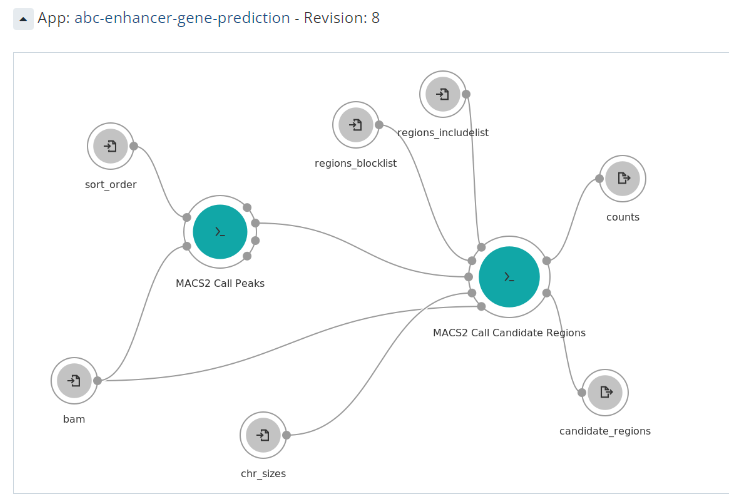